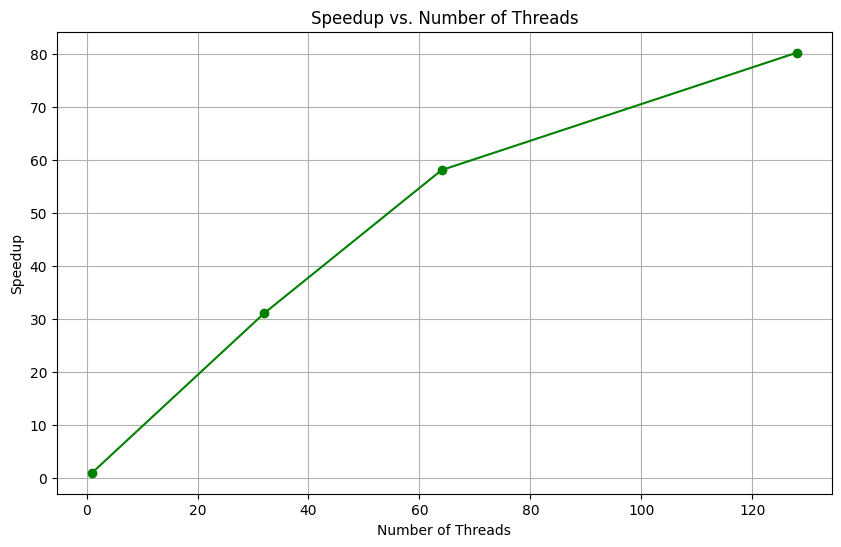

In [2]:
import matplotlib.pyplot as plt

# Calculate speedup for each thread count
speedup_32 = 16.650684 / 0.535955
speedup_64 = 16.650684 / 0.286636
speedup_128 = 16.650684 / 0.207543

# Data for plotting
thread_counts = [1, 32, 64, 128]
speedups = [1, speedup_32, speedup_64, speedup_128]

# Create the speedup plot
plt.figure(figsize=(10, 6))
plt.plot(thread_counts, speedups, marker='o', linestyle='-', color='g')

# Add titles and labels
plt.title('Speedup vs. Number of Threads')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

# Ex 4 Execution Time VS Scheduling Stuff 

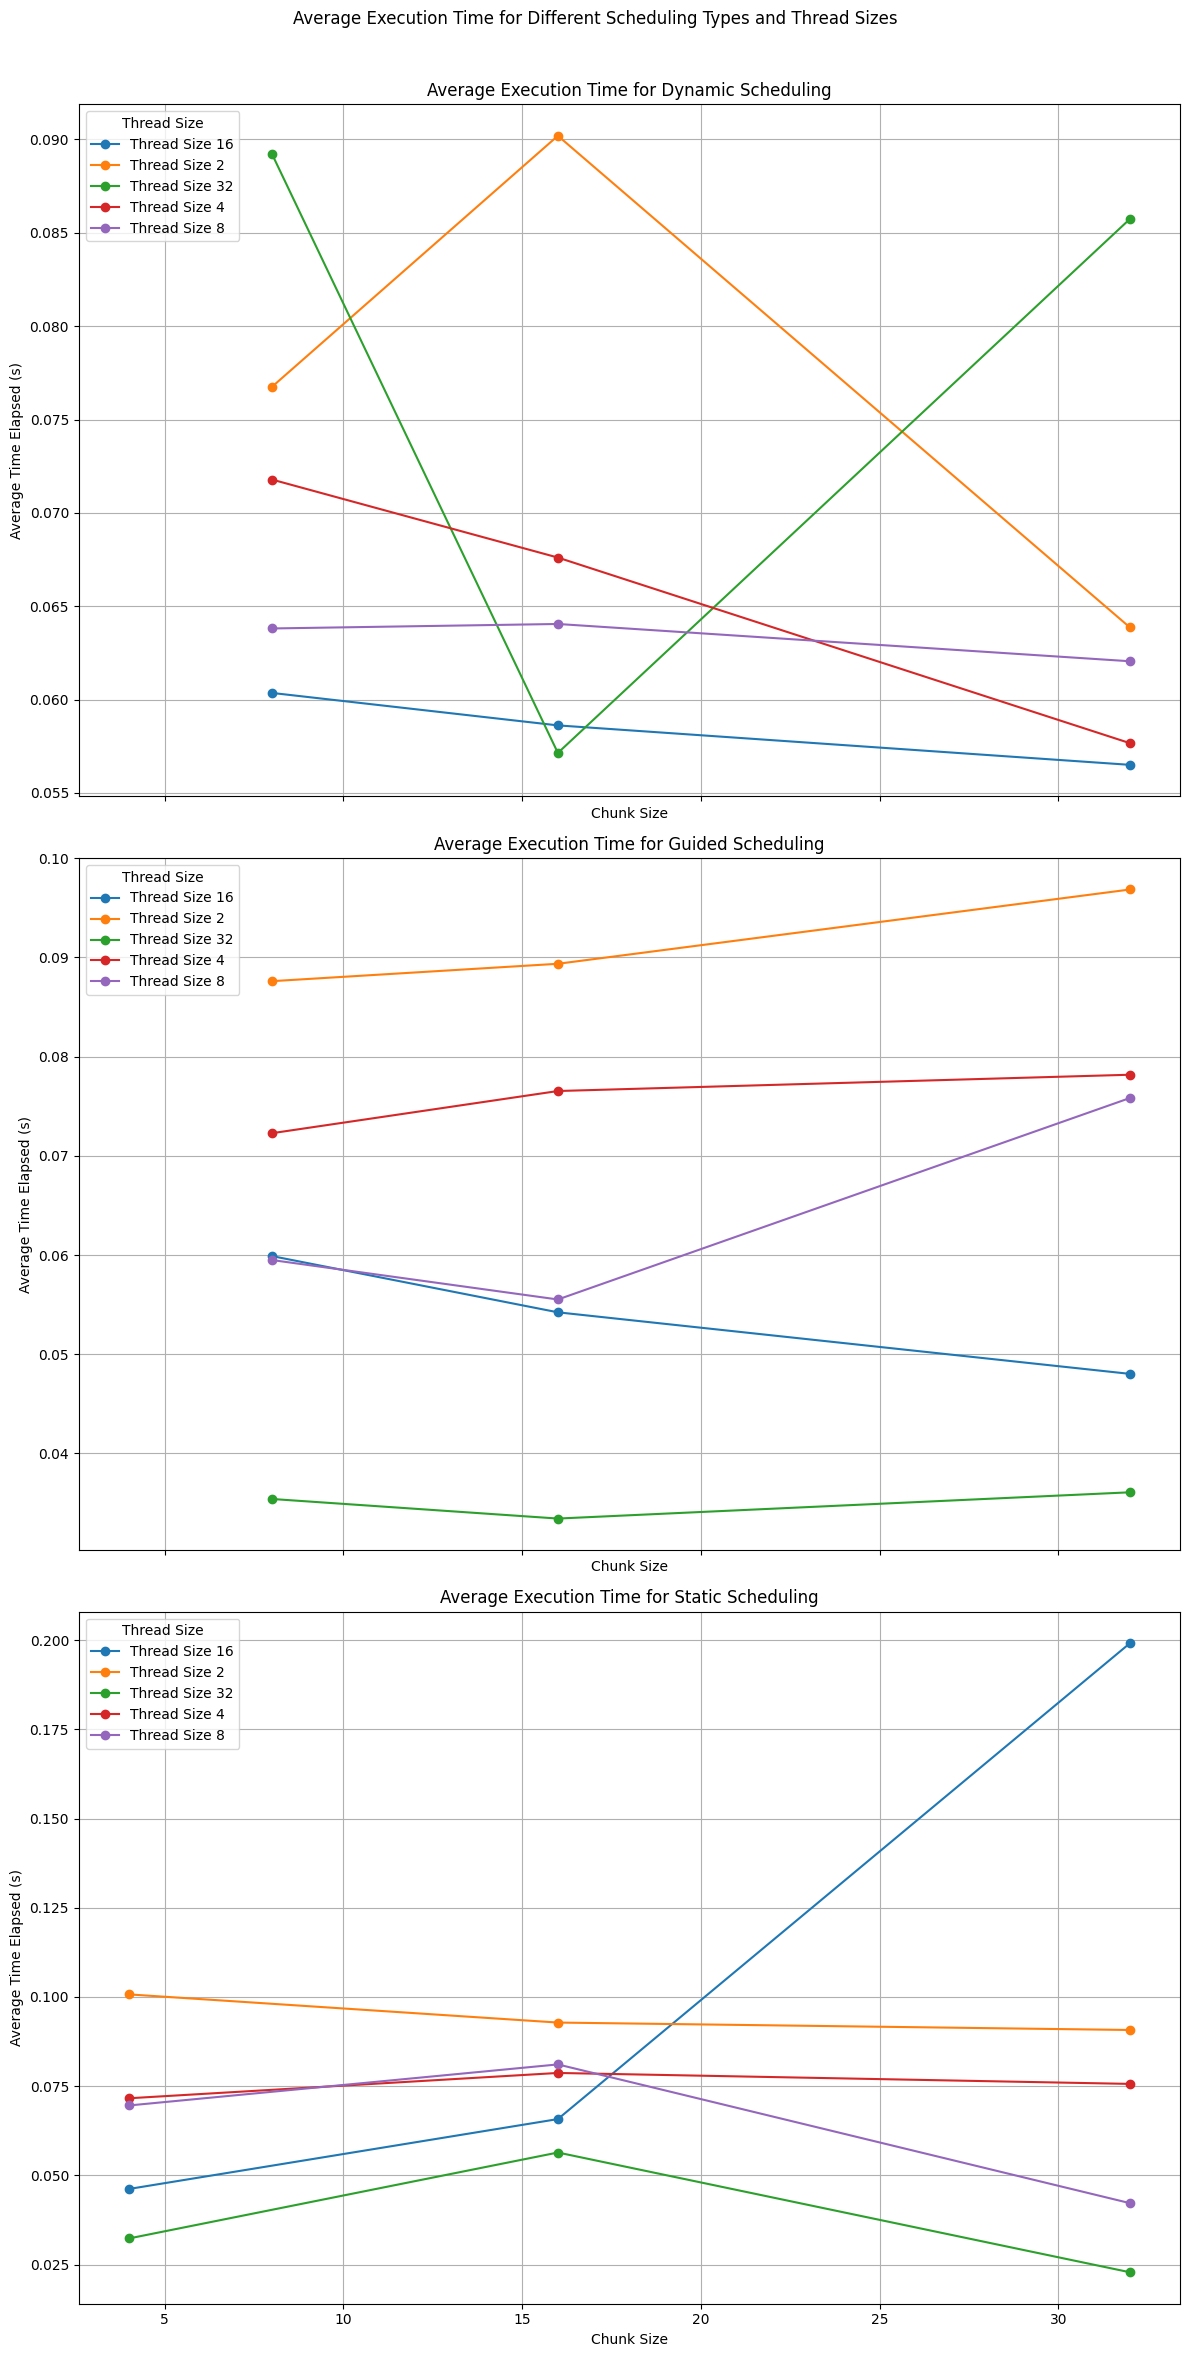

In [ ]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
# Assuming the notebook is in 'task2' and we need to go up one level to 'profiling'
base_directory = os.path.join(current_working_directory, 'batch_output', 'ex_5')

# Normalize the path to handle any relative path issues
base_directory = os.path.normpath(base_directory)

# Check if the base directory exists
if not os.path.exists(base_directory):
    raise FileNotFoundError(f"The directory {base_directory} does not exist.")

# Regular expression pattern to extract scheduling type, thread size, and chunk size from the filename
filename_pattern = r"performance_data_(\w+)_(\d+)_(\d+)\.txt$"

# Regular expression pattern to extract the execution time from the file content
time_elapsed_pattern = r"Execution time with scheduling: ([\d.]+) seconds"

# Dictionary to store execution times grouped by scheduling type, thread size, and chunk size
execution_times = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
average_times = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# List all files matching the pattern in the base directory
files = glob.glob(os.path.join(base_directory, "performance_data_*.txt"))

# Filter out directories, keep only files
files = [f for f in files if os.path.isfile(f)]

# Sort files in ascending order
files.sort()

# Loop through all files matching the pattern
for file_path in files:
    with open(file_path, 'r') as file:
        file_content = file.read()

        # Extract scheduling type, thread size, and chunk size from the filename
        filename_match = re.search(filename_pattern, os.path.basename(file_path))
        if filename_match:
            scheduling_type = filename_match.group(1)
            thread_size = int(filename_match.group(2))
            chunk_size = int(filename_match.group(3))

            # Extracting the time elapsed in seconds
            time_elapsed_match = re.search(time_elapsed_pattern, file_content)
            time_elapsed_seconds = time_elapsed_match.group(1) if time_elapsed_match else None

            # Store the execution times grouped by scheduling type, thread size, and chunk size
            if time_elapsed_seconds:
                execution_times[scheduling_type][thread_size][chunk_size].append(float(time_elapsed_seconds))

# Calculate the average execution time for each combination
for scheduling_type, thread_data in execution_times.items():
    for thread_size, chunk_data in thread_data.items():
        for chunk_size, times in chunk_data.items():
            average_times[scheduling_type][thread_size][chunk_size] = np.mean(times)

# Create subplots for each scheduling type
scheduling_types = ['dynamic', 'guided', 'static']
fig, axes = plt.subplots(nrows=len(scheduling_types), ncols=1, figsize=(12, 24), sharex=True)

for ax, scheduling_type in zip(axes, scheduling_types):
    # Plot data for each thread size
    for thread_size, chunk_data in average_times[scheduling_type].items():
        # Sort the average execution times by chunk size
        sorted_average = dict(sorted(chunk_data.items()))

        # Extract keys and values
        keys = list(sorted_average.keys())
        values = list(sorted_average.values())

        # Plot the data for the current thread size
        ax.plot(keys, values, marker='o', linestyle='-', label=f'Thread Size {thread_size}')

    ax.set_title(f'Average Execution Time for {scheduling_type.capitalize()} Scheduling')
    ax.set_xlabel('Chunk Size')
    ax.set_ylabel('Average Time Elapsed (s)')
    ax.legend(title='Thread Size')
    ax.grid(True)

# Add a common title
fig.suptitle('Average Execution Time for Different Scheduling Types and Thread Sizes')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Display the plot
plt.show()


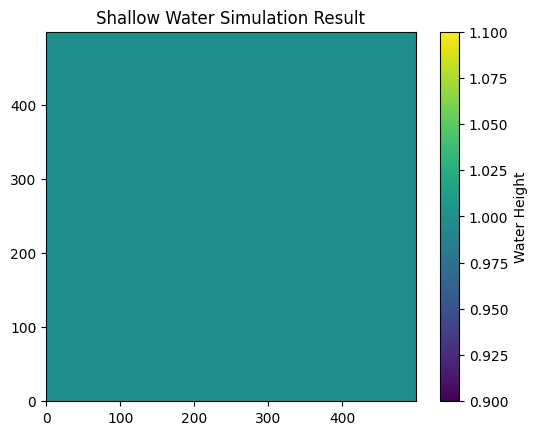

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory of the notebook
current_working_directory = os.getcwd()

# Construct the base directory using a relative path
# Assuming the notebook is in 'task2' and we need to go up one level to 'profiling'
base_directory = os.path.join(current_working_directory, 'batch_output', 'ex_5', 'output.txt')

# Normalize the path to handle any relative path issues
base_directory = os.path.normpath(base_directory)

data = np.loadtxt(base_directory)
plt.imshow(data, cmap='viridis', origin='lower')
plt.colorbar(label='Water Height')
plt.title('Shallow Water Simulation Result')
plt.show()